In [403]:
%matplotlib inline
import pandas as pd
import pickle

## Load results

In [404]:
with open('data/benchmark_metadata11.pkl', 'rb') as f:
    cols_full, cols_short, series = pickle.load(f)

In [405]:
series_names = series
# series_names = [
#     'Masked',
#     'Unmasked',
#     'Masked R',
#     'Unmasked R',
# ]
total_timess = {
   s: pd.read_csv(f'data/benchmark_{s}11.csv')
   for s in series 
}

In [397]:
total_timess = {
   s: d[5:-5]
   for s,d in total_timess.items()
}

## Raw results

In [406]:
from ipywidgets import interact

In [407]:
@interact
def _(series=series):
    return total_timess[series]

interactive(children=(Dropdown(description='series', options=('upfront_symbolic_masked', 'symbolic_masked', 'u…

## Comparison

In [414]:
comparison = pd.DataFrame({
    s: total_times.mean()
    for s, total_times in total_timess.items()
})
comparison.columns = series_names
comparison

,upfront_symbolic_masked,symbolic_masked,upfront_masked,masked,upfront_symbolic_unmasked,symbolic_unmasked,upfront_unmasked,unmasked
Flow*,83.587298,84.975473,84.137215,84.742311,86.550176,87.363583,86.353500,86.548282
unpreconditioning,67.096185,0.000000,84.057745,0.000000,70.759899,0.000000,81.787634,0.000000
P,0.607673,20.349338,1.325839,26.768760,1.478603,22.790763,3.067503,27.754322
Q,39.381192,95.591162,1.591841,39.813575,124.285955,271.951888,6.369605,82.023834
G(P | G(Q)),40.235899,116.044898,3.012905,66.682317,125.867248,294.849331,9.533379,109.884474
tentative eval,0.000000,1.234399,0.000000,0.913776,0.000000,3.782487,0.000000,3.250790
eval,0.468714,1.654495,1.317765,3.153535,1.994131,2.707754,4.941088,4.567168
root detection,0.006056,0.028259,1.495174,2.892998,0.015488,0.039316,4.296578,6.514757
composing flowpipe,67.041002,30.790083,84.006823,59.473258,70.699094,63.059158,81.737260,95.196524
composing atomic,39.058810,81.363580,0.008869,0.016947,122.826644,222.872178,0.021112,0.031897


In [401]:
comparison.to_csv("data/comparison.csv")

In [411]:
comparison_stds = pd.DataFrame({
    s: total_times.std()
    for s, total_times in total_timess.items()
})
comparison_stds.columns = series_names
comparison_stds

,upfront_symbolic_masked,symbolic_masked,upfront_masked,masked,upfront_symbolic_unmasked,symbolic_unmasked,upfront_unmasked,unmasked
Flow*,3.502235,3.137144,3.085685,2.122675,3.850070,3.191857,3.760845,3.279373
unpreconditioning,3.418769,0.000000,7.525700,0.000000,4.359510,0.000000,4.611774,0.000000
P,0.136127,1.166468,0.481542,1.850040,0.506266,1.573554,0.945841,1.474016
Q,2.238145,3.184640,0.338265,10.783791,7.741478,11.808602,1.379841,10.156908
G(P | G(Q)),2.395072,3.364582,0.725383,11.034514,7.774593,11.800114,1.673112,10.360140
tentative eval,0.000000,0.138015,0.000000,0.128080,0.000000,0.542754,0.000000,0.243048
eval,0.064358,0.146940,0.361091,0.763604,0.386058,0.216958,0.901943,0.738160
root detection,0.000329,0.008745,0.355535,0.397067,0.000742,0.010566,0.908474,1.143479
composing flowpipe,3.417811,1.086221,7.523646,9.925190,4.358184,2.499374,4.609828,8.952251
composing atomic,2.256636,2.822058,0.001413,0.003078,7.689234,10.737760,0.003627,0.003333


In [415]:
comparison2 = comparison.loc[['P', 'Q'],:].transpose(copy=True)
comparison2

,P,Q
upfront_symbolic_masked,0.607673,39.381192
symbolic_masked,20.349338,95.591162
upfront_masked,1.325839,1.591841
masked,26.768760,39.813575
upfront_symbolic_unmasked,1.478603,124.285955
symbolic_unmasked,22.790763,271.951888
upfront_unmasked,3.067503,6.369605
unmasked,27.754322,82.023834


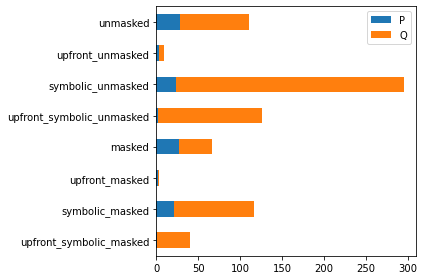

In [416]:
p = comparison2.plot(kind='barh', stacked=True, grid=False)
p

In [417]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import matplotlib.pyplot as plt
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [418]:
p.get_figure().savefig('images/comparison-analysis-bar-chart-1.pdf')

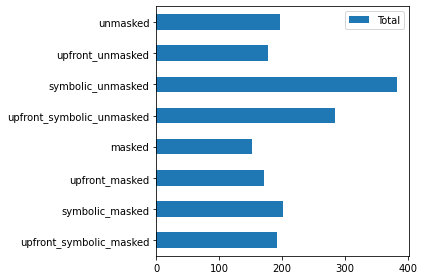

In [420]:
comparison3 = comparison.loc[['Total'],:].transpose(copy=True)
comparison3.plot(kind='barh')

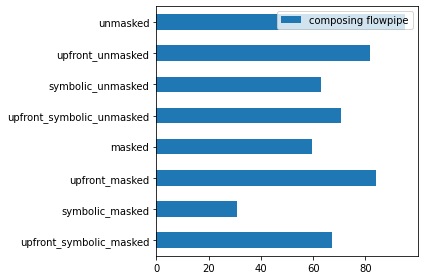

In [421]:
comparison_compo = comparison.loc[['composing flowpipe'],:].transpose(copy=True)
comparison_compo.plot(kind='barh')

In [422]:
_.get_figure().savefig('images/unpreconditioning_comparison.pdf')

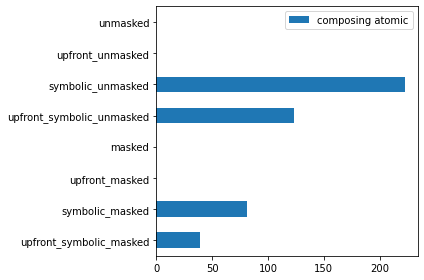

In [423]:
comparison_compo_atomic = comparison.loc[['composing atomic'],:].transpose(copy=True)
comparison_compo_atomic.plot(kind='barh')

In [424]:
_.get_figure().savefig('images/composing_atomic_comparison.pdf')

In [425]:
comparison5 = comparison.loc[['composing flowpipe'],:].transpose(copy=True)
comparison5

,composing flowpipe
upfront_symbolic_masked,67.041002
symbolic_masked,30.790083
upfront_masked,84.006823
masked,59.473258
upfront_symbolic_unmasked,70.699094
symbolic_unmasked,63.059158
upfront_unmasked,81.737260
unmasked,95.196524


In [426]:
comparison4 = comparison.loc[['Flow*', 'P', 'Q', 'Total'],:].transpose(copy=True)
comparison4

,Flow*,P,Q,Total
upfront_symbolic_masked,83.587298,0.607673,39.381192,191.046162
symbolic_masked,84.975473,20.349338,95.591162,201.152832
upfront_masked,84.137215,1.325839,1.591841,171.350407
masked,84.742311,26.768760,39.813575,151.571814
upfront_symbolic_unmasked,86.550176,1.478603,124.285955,283.304926
symbolic_unmasked,87.363583,22.790763,271.951888,382.345947
upfront_unmasked,86.353500,3.067503,6.369605,177.818651
unmasked,86.548282,27.754322,82.023834,196.587389


In [427]:
upfront_cols = [s for s in series if 'upfront' in s]
upfront_cols

['upfront_symbolic_masked',
 'upfront_masked',
 'upfront_symbolic_unmasked',
 'upfront_unmasked']

In [428]:
comparison.loc[['unpreconditioning'], upfront_cols].transpose()

,unpreconditioning
upfront_symbolic_masked,67.096185
upfront_masked,84.057745
upfront_symbolic_unmasked,70.759899
upfront_unmasked,81.787634


In [429]:
comparison6 = comparison4.join(comparison.loc[['unpreconditioning'], upfront_cols].transpose(copy=True),
                               how='outer')
comparison6['unpreconditioning'].fillna(0, inplace=True)
cols = comparison6.columns.tolist()
print(cols)
cols = cols[:1] + cols[-1:] + cols[1:-1]
print(cols)
comparison6 = comparison6[cols]
comparison6

['Flow*', 'P', 'Q', 'Total', 'unpreconditioning']
['Flow*', 'unpreconditioning', 'P', 'Q', 'Total']


,Flow*,unpreconditioning,P,Q,Total
masked,84.742311,0.000000,26.768760,39.813575,151.571814
symbolic_masked,84.975473,0.000000,20.349338,95.591162,201.152832
symbolic_unmasked,87.363583,0.000000,22.790763,271.951888,382.345947
unmasked,86.548282,0.000000,27.754322,82.023834,196.587389
upfront_masked,84.137215,84.057745,1.325839,1.591841,171.350407
upfront_symbolic_masked,83.587298,67.096185,0.607673,39.381192,191.046162
upfront_symbolic_unmasked,86.550176,70.759899,1.478603,124.285955,283.304926
upfront_unmasked,86.353500,81.787634,3.067503,6.369605,177.818651


In [510]:
rearranged_colors = ('#0A5C9F', 'tab:blue', 'tab:orange', 'tab:green')

In [498]:
p.get_figure().savefig('images/full-upfront-comparison.pdf')

In [659]:
chosen_rows, chosen_names = zip(*[
#    'upfront_unmasked',
     ('upfront_unmasked', 'Closed-box\n monitoring'),
#    ('upfront_symbolic_unmasked', 'Unpreconditioning upfront symb'),
#    'upfront_symbolic_unmasked',
    ('unmasked', 'Functional\n composition'),
#    'symbolic_unmasked',
    ('symbolic_unmasked', 'Full\n monitoring'),
    ('symbolic_masked', 'Masked\n monitoring'),
#    'symbolic_masked_reversed',
#    'symbolic_masked_reversed',
])

In [660]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)  

In [661]:
comparison6[['Total']].sum(axis=1) 

masked                       151.571814
symbolic_masked              201.152832
symbolic_unmasked            382.345947
unmasked                     196.587389
upfront_masked               171.350407
upfront_symbolic_masked      191.046162
upfront_symbolic_unmasked    283.304926
upfront_unmasked             177.818651
dtype: float64

In [662]:
comparison6[cols[:-1]].sum(axis=1)

masked                       151.324647
symbolic_masked              200.915973
symbolic_unmasked            382.106234
unmasked                     196.326438
upfront_masked               171.112640
upfront_symbolic_masked      190.672348
upfront_symbolic_unmasked    283.074634
upfront_unmasked             177.578242
dtype: float64

In [663]:
comparison6.sum(axis=1)

masked                       302.896461
symbolic_masked              402.068805
symbolic_unmasked            764.452181
unmasked                     392.913827
upfront_masked               342.463047
upfront_symbolic_masked      381.718511
upfront_symbolic_unmasked    566.379560
upfront_unmasked             355.396893
dtype: float64

In [664]:
rem = comparison6[['Total']].sum(axis=1) - comparison6[cols[:-1]].sum(axis=1)
rem

masked                       0.247167
symbolic_masked              0.236858
symbolic_unmasked            0.239713
unmasked                     0.260951
upfront_masked               0.237766
upfront_symbolic_masked      0.373814
upfront_symbolic_unmasked    0.230292
upfront_unmasked             0.240408
dtype: float64

In [665]:
comparison7 = comparison6.copy()
comparison7.loc[:,'Remainder'] = rem
cols7 = comparison6.columns.tolist()
print(cols)
cols7 = cols7[:-2] + [cols7[-1], cols7[-2]]
print(cols)
comparison7 = comparison7[cols7]
comparison7

['Flow*', 'unpreconditioning', 'P', 'Q', 'Total']
['Flow*', 'unpreconditioning', 'P', 'Q', 'Total']


,Flow*,unpreconditioning,P,Total,Q
masked,84.742311,0.000000,26.768760,151.571814,39.813575
symbolic_masked,84.975473,0.000000,20.349338,201.152832,95.591162
symbolic_unmasked,87.363583,0.000000,22.790763,382.345947,271.951888
unmasked,86.548282,0.000000,27.754322,196.587389,82.023834
upfront_masked,84.137215,84.057745,1.325839,171.350407,1.591841
upfront_symbolic_masked,83.587298,67.096185,0.607673,191.046162,39.381192
upfront_symbolic_unmasked,86.550176,70.759899,1.478603,283.304926,124.285955
upfront_unmasked,86.353500,81.787634,3.067503,177.818651,6.369605


In [666]:
comparison6['Total']['masked']

151.5718137822696

In [667]:
list(comparison6['Total'][reversed(chosen_rows)].items())

[('symbolic_masked', 201.15283153290318),
 ('symbolic_unmasked', 382.3459472062493),
 ('unmasked', 196.58738865159296),
 ('upfront_unmasked', 177.81865061582454)]

In [668]:
comp6_plot_data = comparison6.loc[reversed(chosen_rows),:][cols[:-1]].copy()
comp6_plot_data = comp6_plot_data.transpose()
comp6_plot_data.columns = reversed(chosen_names)
comp6_plot_data = comp6_plot_data.transpose()
comp6_plot_data.columns = [
    'Verified integration',
    'Flowpipe composition',
    'Monitoring P',
    'Monitoring Q',
]
comp6_plot_data

,Verified integration,Flowpipe composition,Monitoring P,Monitoring Q
Masked\n monitoring,84.975473,0.000000,20.349338,95.591162
Full\n monitoring,87.363583,0.000000,22.790763,271.951888
Functional\n composition,86.548282,0.000000,27.754322,82.023834
Closed-box\n monitoring,86.353500,81.787634,3.067503,6.369605


In [669]:
rcParams['font.family'] = 'Latin Modern Sans'
rcParams['font.size'] = 13.5
rcParams['text.usetex'] = False

'lmsans9-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


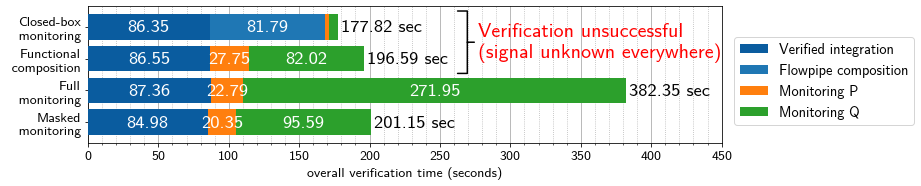

In [701]:
p = comp6_plot_data\
    .plot(kind='barh', stacked=True, grid=False,color=rearranged_colors, figsize=(13,2.8),
          zorder=3, width=0.8)
#plt.legend(loc=(1.05, 0.105))
plt.legend(fontsize=14, loc=(1.02, 0.13))
plt.xlabel('overall verification time (seconds)')
ax = plt.gca()
ax.set_xticks(np.arange(0, 451, 50))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.grid(True, zorder=0, linestyle='-', color='darkgrey', which='major')
ax.xaxis.grid(True, zorder=0, linestyle='dotted', which='minor')

labels = [
    f"{t:.2f} sec"
#     + ('' if 'symbolic' in row
#           else "\n (returned unknown)")
    for row, t in comparison6['Total'][reversed(chosen_rows)].items()
]

def anno_inner(p, label, color='black'):
    ax.annotate(
        label,
        xy=(p.get_x() + p.get_width()/2 ,
            p.get_y() + p.get_height()/2),
        xytext=(0, 0),
        size=18,
        textcoords="offset points",
        va='center', ha='center',
        color=color
    )

for i, p in enumerate(ax.patches):
    if p.get_width() > 10:
        col = ['Flow*', 'unpreconditioning', 'P', 'Q'][i // 4]
        anno_inner(p, f"{comparison6[col][chosen_rows[3-(i % 4)]]:.2f}", 'white')
        
for i, label in zip(ax.patches[-4:], labels):
    ax.annotate(
        label,
        xy=(i.get_x() + i.get_width(),
            i.get_y() + i.get_height()/2),
        xytext=(3, 0),
        textcoords="offset points",
        va='center', ha='left',
        size='18'
    )
    
plt.annotate(
    'Verification unsuccessful\n(signal unknown everywhere)',
    xy=(268, 2.52),
    va='center', ha='left',
    xytext=(13,0),
#    weight='bold',
    textcoords="offset points",
    color='red',
    size=19.5,
    arrowprops=dict(arrowstyle='-[, widthB=1.6, lengthB=0.5, angleB=60', lw=1.5),
)

plt.tight_layout()
plt.savefig('images/benchmark-bar-chart.pdf')
plt.show()

In [681]:
comparison7['Q']['symbolic_unmasked']

271.95188828309375

In [684]:
Qs = comparison7['Q']; Qs

masked                        39.813575
symbolic_masked               95.591162
symbolic_unmasked            271.951888
unmasked                      82.023834
upfront_masked                 1.591841
upfront_symbolic_masked       39.381192
upfront_symbolic_unmasked    124.285955
upfront_unmasked               6.369605
Name: Q, dtype: float64

In [683]:
(Qs['symbolic_unmasked'] - Qs['symbolic_masked'])/Qs['symbolic_unmasked']

0.6484997291871156

In [675]:
comparison7['unmasked_symbolic']['Q']

KeyError: 'unmasked_symbolic'

In [673]:
(comparison7['unmasked_symbolic']['Q'] - comparison7['masked_symbolic']['Q']) / comparison7['unmasked_symbolic']['Q']

KeyError: 'unmasked_symbolic'

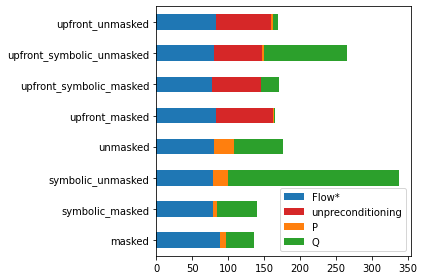

In [58]:
p = comparison6[cols[:-1]].plot(
                    kind='barh', stacked=True, grid=False,
                     color=rearranged_colors)
p

In [28]:
comparison.loc[:,chosen_columns]

,upfront_unmasked,unmasked,symbolic_unmasked,symbolic_masked
Flow*,82.258631,79.551850,78.870518,78.083259
unpreconditioning,77.629671,0.000000,0.000000,0.000000
P,2.871566,28.578011,21.243604,6.771044
Q,6.497924,67.533209,237.785437,54.428931
G(P | G(Q)),9.463389,96.202800,259.128790,61.303555
tentative eval,0.000000,3.073284,3.592893,0.646078
eval,4.841570,3.833150,2.413262,0.617105
root detection,4.310877,5.651744,0.037560,0.013074
composing flowpipe,77.574421,83.307537,58.222266,13.728399
composing atomic,0.021429,0.028341,193.635825,45.798945


In [29]:
p.get_figure().savefig('images/comparison-analysis7-bar-chart-2.pdf')

In [30]:
comparison5 = comparison6.copy()

In [31]:
comparison.loc[['Flow*', 'G(P | G(Q))'], :].transpose()

,Flow*,G(P | G(Q))
upfront_symbolic_masked,77.704968,25.222963
symbolic_masked,78.083259,61.303555
upfront_masked,82.934898,1.853803
masked,87.898530,48.431379
upfront_symbolic_unmasked,80.336791,117.882873
symbolic_unmasked,78.870518,259.128790
upfront_unmasked,82.258631,9.463389
unmasked,79.551850,96.202800


In [32]:
rem = comparison.loc[['Total'], :].transpose().sum(axis=1) - comparison6.sum(axis=1)
rem

masked                       0.245319
symbolic_masked              0.223994
symbolic_unmasked            0.223973
unmasked                     0.231742
upfront_masked               0.238025
upfront_symbolic_masked      0.228357
upfront_symbolic_unmasked    0.217138
upfront_unmasked             0.233503
dtype: float64

In [33]:
comparison6.loc[:,'Remainder'] = rem

In [34]:
comparison6

,Flow*,unpreconditioning,P,Q,Remainder
masked,87.898530,0.000000,9.285413,39.050409,0.245319
symbolic_masked,78.083259,0.000000,6.771044,54.428931,0.223994
symbolic_unmasked,78.870518,0.000000,21.243604,237.785437,0.223973
unmasked,79.551850,0.000000,28.578011,67.533209,0.231742
upfront_masked,82.934898,79.827351,0.733038,1.026020,0.238025
upfront_symbolic_masked,77.704968,67.341991,0.429924,24.689693,0.228357
upfront_symbolic_unmasked,80.336791,66.905820,1.816989,115.969380,0.217138
upfront_unmasked,82.258631,77.629671,2.871566,6.497924,0.233503


In [35]:
comparison5.to_csv("data/comparison-remainder-analysis.csv")

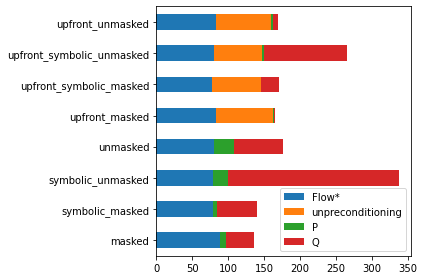

In [36]:
p = comparison5.plot(kind='barh', stacked=True, grid=False); p

In [37]:
p.get_figure().savefig(
    'images/key-comparison-analysis-bar-chart.pdf')

In [38]:
comparison6 = comparison.loc[['Flow*', 'P', 'Q', 'Total'], :].transpose()

In [39]:
comparison6

,Flow*,P,Q,Total
upfront_symbolic_masked,77.704968,0.429924,24.689693,170.394933
symbolic_masked,78.083259,6.771044,54.428931,139.507228
upfront_masked,82.934898,0.733038,1.026020,164.759333
masked,87.898530,9.285413,39.050409,136.479671
upfront_symbolic_unmasked,80.336791,1.816989,115.969380,265.246118
symbolic_unmasked,78.870518,21.243604,237.785437,338.123532
upfront_unmasked,82.258631,2.871566,6.497924,169.491295
unmasked,79.551850,28.578011,67.533209,175.894812


In [40]:
comparison6.to_csv('data/key-comparison-analysis.csv')

In [41]:
comparison3.loc['unmasked',:] / comparison3.loc['masked',:]

Total    1.288799
dtype: float64

In [42]:
comparison3.loc['unmasked_no_symbolic',:] / comparison3.loc['masked_no_symbolic',:]

KeyError: 'unmasked_no_symbolic'

In [ ]:
comparison3.loc['masked',:] / comparison3.loc['masked_no_symbolic',:]

In [ ]:
comparison3.loc['unmasked',:] / comparison3.loc['unmasked_no_symbolic',:]

In [ ]:
comparison3.loc['masked_symbolic_low_order',:] / comparison3.loc['masked_no_symbolic',:]